In [5]:
## Import packages, set up environment, and load model and evaluation data
import os
import numpy as np
import matplotlib.pyplot as plt
model_name = "dqn_hist_hack_4"
path = os.path.join('..', '..', 'trained_models', "dqn", model_name)
## If needed, copy config dict.

In [32]:
## Load eval data and remove NaNs
print(path + "_reward_history.npy")
rewards = np.load(path + "_reward_history.npy")
success = np.load(path + "_success_history.npy")
states = np.load(path + "_state_history.npy")
actions = np.load(path + "_action_history.npy")
print(np.mean(success))

## Select only the states and actions that are not NaN
print(states.shape)
nan_idx = np.isnan(states[:,:,0])
states = states[~nan_idx]
actions = actions[~nan_idx]
print(states.shape)

../../trained_models/dqn/dqn_hist_hack_4_reward_history.npy
0.154
(500, 4000, 35)
(2000000, 35)


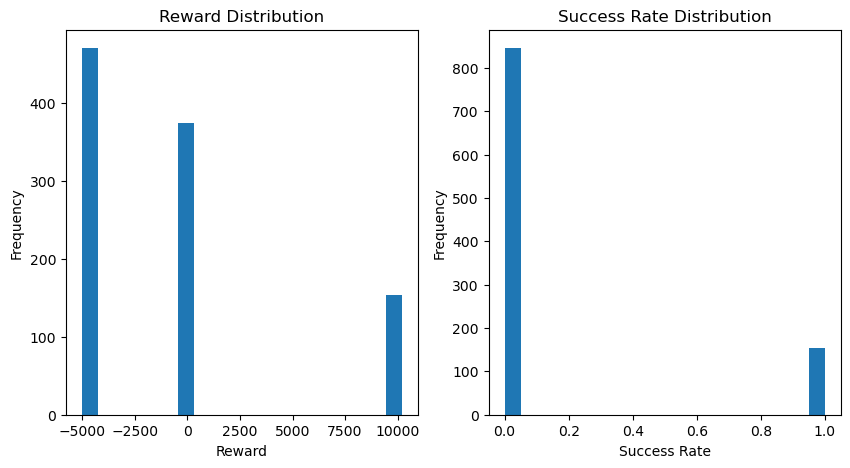

In [7]:
## Plot reward and success rate pdfs in evaluation data

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].hist(rewards, bins=20)
ax[0].set_xlabel("Reward")
ax[0].set_ylabel("Frequency")
ax[0].set_title("Reward Distribution")

ax[1].hist(success, bins=20)
ax[1].set_xlabel("Success Rate")
ax[1].set_ylabel("Frequency")
ax[1].set_title("Success Rate Distribution")

plt.show()

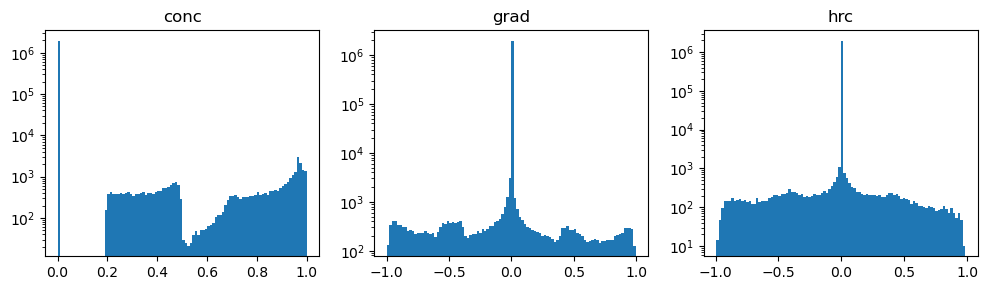

In [11]:
## Plot state and action pdfs in evaluation data
sname = ['conc', 'grad', 'hrc']
fig, axes = plt.subplots(1, 3, figsize = (10,3))
for i, ax in enumerate(axes.flatten()):
    ax.hist(states[:,i], bins = 100)
    ax.set_yscale('log')
    ax.set_title(sname[i])
plt.tight_layout()

(2000000, 4)


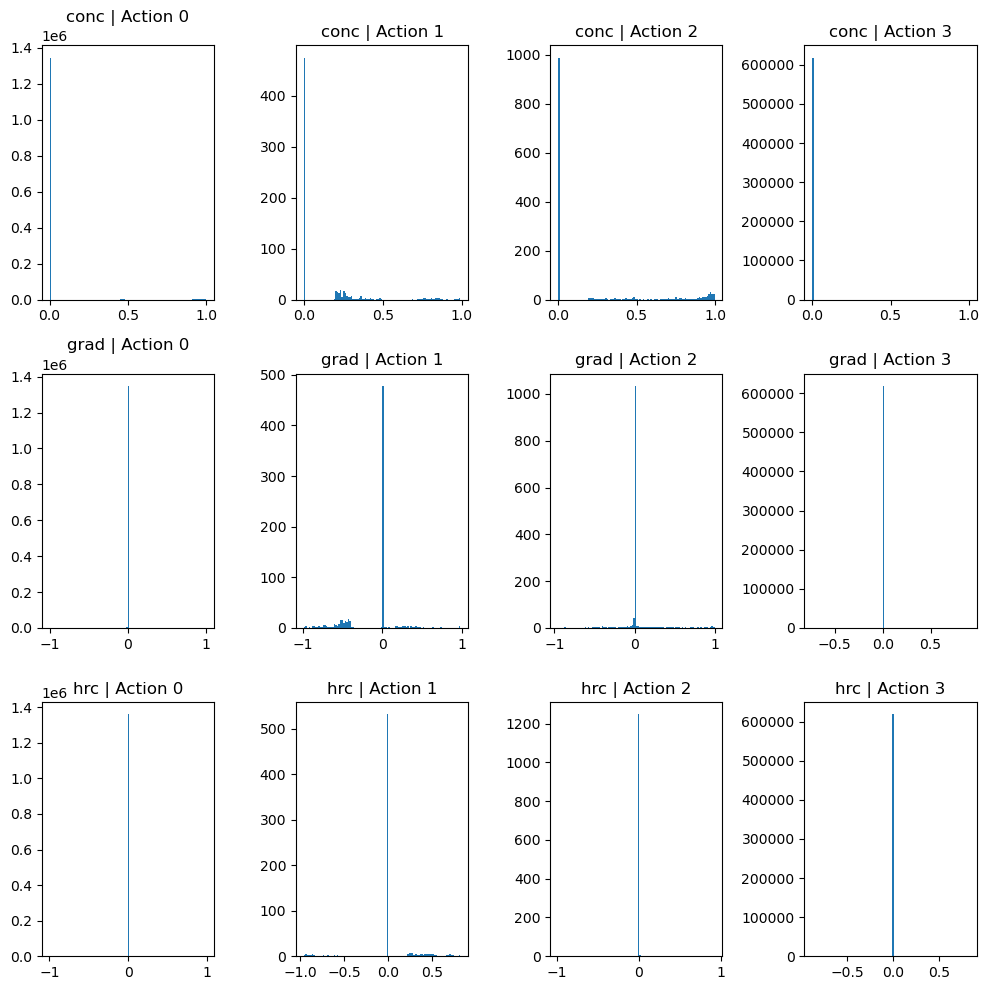

In [30]:
## Plot state dicts conditioned on previous actions
n_obs = 3
n_action = 4
fig, axes = plt.subplots(n_obs, n_action, figsize = (10,10))
print(actions.shape)
for obs in range(n_obs):
    for act in range(n_action):
        axes[obs, act].hist(states[actions[:,act]==act,obs], bins = 100)
        #axes[obs, act].set_yscale('log')
        axes[obs, act].set_title(sname[obs]+' | Action '+str(act))
plt.tight_layout()

In [22]:
x = np.zeros((2,4))
x[1, :] = 3
print(x)

[[0. 0. 0. 0.]
 [3. 3. 3. 3.]]
